In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
from sklearn.datasets import make_classification

X , y = make_classification(n_samples=1000 , n_features=2 , n_classes=2 , n_clusters_per_class=1 , n_redundant=0)

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
x1 = pd.DataFrame(X)[0]
x2 = pd.DataFrame(X)[1]

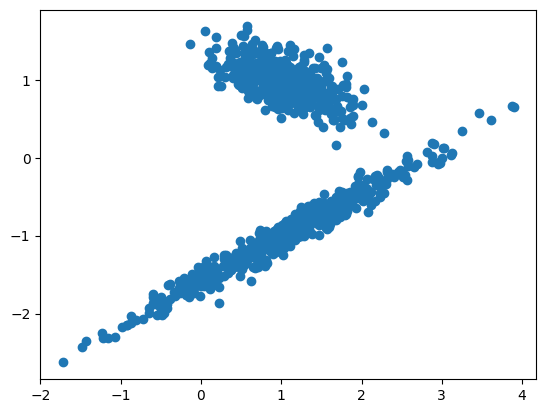

In [14]:
plt.scatter(x1,x2)

In [15]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

In [ ]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       118
           1       0.99      0.98      0.99       132

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



For Dataset with many cluster

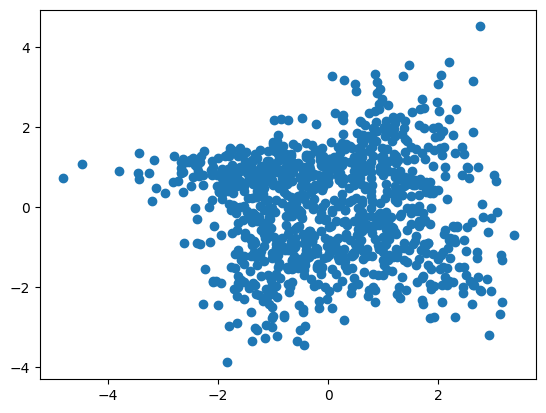

In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X , y = make_classification(n_samples=1000 , n_features=2 , n_classes=2 , n_clusters_per_class=2 , n_redundant=0)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

x1 = pd.DataFrame(X)[0]
x2 = pd.DataFrame(X)[1]

plt.scatter(x1,x2)

Testing with different kernels

In [32]:
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       135
           1       0.82      0.86      0.84       115

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



In [33]:
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train,y_train)
y_pred1 = rbf.predict(X_test)
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       135
           1       0.82      0.88      0.85       115

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [34]:
sig = SVC(kernel = 'sigmoid')
sig.fit(X_train,y_train)
y_pred2 = sig.predict(X_test)
print(classification_report(y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       135
           1       0.64      0.65      0.65       115

    accuracy                           0.67       250
   macro avg       0.67      0.67      0.67       250
weighted avg       0.67      0.67      0.67       250



In [35]:
poly = SVC(kernel = 'poly')
poly.fit(X_train,y_train)
y_pred3 = poly.predict(X_test)
print(classification_report(y_test , y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       135
           1       0.82      0.85      0.84       115

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



HYPERPARAMETER TUNING

In [59]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C' : [0.01,0.1,1,10,100,1000],
    'kernel' : ['linear','poly','rbf','sigmoid']
}

grid = RandomizedSearchCV(estimator=SVC(),param_distributions=params,refit=True,verbose=3,cv=5)

In [60]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...............C=0.01, kernel=poly;, score=0.780 total time=   0.0s
[CV 2/5] END ...............C=0.01, kernel=poly;, score=0.860 total time=   0.0s
[CV 3/5] END ...............C=0.01, kernel=poly;, score=0.880 total time=   0.0s
[CV 4/5] END ...............C=0.01, kernel=poly;, score=0.807 total time=   0.0s
[CV 5/5] END ...............C=0.01, kernel=poly;, score=0.833 total time=   0.0s
[CV 1/5] END .................C=10, kernel=poly;, score=0.827 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;, score=0.887 total time=   0.0s
[CV 3/5] END .................C=10, kernel=poly;, score=0.880 total time=   0.0s
[CV 4/5] END .................C=10, kernel=poly;, score=0.887 total time=   0.0s
[CV 5/5] END .................C=10, kernel=poly;, score=0.867 total time=   0.0s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.827 total time=   0.0s
[CV 2/5] END ..............C=100, kernel=linear;

,estimator,SVC()
,param_distributions,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [61]:
grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [ ]:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test , y_pred4))

#Defualt Params are rbf and C = 1 , hence first model has same accuracy as grid 

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       135
           1       0.82      0.88      0.85       115

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

